# Linear Regression 
- Linear Regression means to identify the best fit line with the help of low error
## Simple Linear Regression :
In Simple Linear Regression we have only one independent and one dependent feature .So they are totally Two features f1 and f2. 
f1 is my independent feature and f2 is my dependent feature
- Formula For Simple Linear Regression : y = mx + c  Otherwise y = β0 + (β1 * x)
- where m is the coeffcient( slope).  c is the intercept.   x is my independent feature and    y is my dependent feature
- where where β1 is the coeffcient( slope).  β0 is the intercept.   x is my independent feature and    y is my dependent feature 
## Multiple Linear Regression :
In Multiple Linear Regression we Have more than 1 features  suppose i have 5 featrures f1,f2,f3,f4,f5 . f1,f2,f3,f4 is my independent features and f5 is my dependent features+
- Formula For Multiple Linear Regression : y =(m1* x1 + m2*x2 + m3*x3 + m4*x4) + c  Otherwise y = β0 +(β1*x1 + β2*x2 + β3*x3 + β4*x4)
- It is based on the features you have
## Ridge & Lasso Regression :
Suppose our best fit line is overfitting we  change the overfitting line into best line using Ridge & Lasso Regression 
- Overfitting means the line has low bias and high variance 
- Ridge & Lasso Regression used to change the high variance into low variance

## Simple Linear Regression with Example Area dataset using Sklearn library


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


In [136]:
df=pd.read_csv("canada_per_capita_income.csv")
df.head()

,year,per_capita
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [137]:
df.shape

(47, 2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

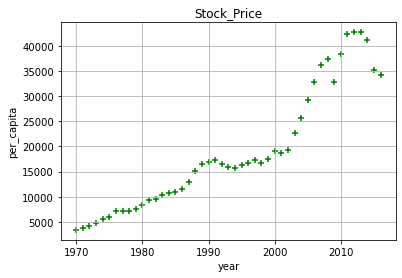

In [139]:
%matplotlib inline
plt.scatter(df.year,df.per_capita,color='green',marker='+')
plt.xlabel('year')
plt.ylabel('per_capita')
plt.title("Stock_Price")
plt.grid()
plt.show()
# Now we see the plot of our dataset

In [157]:
# Now We create object for our LinearRegression 
reg=LinearRegression()
# Now we fit our dataset as area and price
reg.fit(df[['year']],df.per_capita)


LinearRegression()

In [155]:
reg.predict([[2018]])

array([39631.76394397])

In [159]:
reg.score(df[['year']],df.per_capita)

0.890916917957032

In [ ]:
# So we see our Model Accuracy is 89%

# Multiple Linear Regression with Example startup dataset using Sklearn library¶

In [2]:
df=pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
# We seperate dependent and independent features x and y
x=df.drop("Profit",axis=1)
y=df.Profit
# So x is myindependent feature and y is my dependent feature

In [3]:
# So we see there is a categorical feature we change using onehot Encoding
df.State.value_counts()  # there are 3 labels in  the feature 

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [6]:
# now we get the dummy datas for onehotencoding
states = pd.get_dummies(x.State,drop_first=True)
states.head()
# So It converted  into dummy dataset

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [7]:
# Now we delete the Orginal State column which have categorical feature
x=x.drop("State",axis=1)
x.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [8]:
# Now we concat the dummy dataset
x=pd.concat([x,states],axis=1) 
x.head()
# Now we concat the dummyn dataset into our dataset
# 0 1 means NewYork 1 0 means florida and 0 0 means california

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [ ]:
# so R&D Spend is my x1, Administration is my x2, Marketing Spend is my x3, Florida is my x4 and NewYork is my x5

In [56]:
# now we Split Test and Train Dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
# test_size = 0.2 means in divide the dataset 80% are training and 20% are test dataset
# random_state means it doesnot change anymore we  give any number

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [11]:
# we fit our datas 
regressor.fit(x_train,y_train)

LinearRegression()

In [12]:
y_pred=regressor.predict(x_test)
y_pred
# So we see it predict the test dataset

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [13]:
x_test

,R&D Spend,Administration,Marketing Spend,Florida,New York
28,66051.52,182645.56,118148.20,1,0
11,100671.96,91790.61,249744.55,0,0
10,101913.08,110594.11,229160.95,1,0
41,27892.92,84710.77,164470.71,1,0
2,153441.51,101145.55,407934.54,1,0
27,72107.60,127864.55,353183.81,0,1
38,20229.59,65947.93,185265.10,0,1
31,61136.38,152701.92,88218.23,0,1
22,73994.56,122782.75,303319.26,1,0
4,142107.34,91391.77,366168.42,1,0


In [14]:
y_test

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64

In [15]:
# now we check thew accuracy 
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score
# So our Acccuracy is 93% and it is good model

0.9347068473282423

## Ridge & Lasso Regression 

In [1]:
from sklearn.datasets import load_boston
# So we use the dataset in Sklearn called load_boston
# It is inbuild dataset in Sklearn

In [2]:
# now we load our dataset 
df=load_boston()
df
# ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT'] these are the columns 
# and others are my value

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
# Now we convert this into dataframe 
dataset = pd.DataFrame(df.data)
print(dataset.head())
# So these are my independent featurte 
# my dependent feature is Target

<IPython.core.display.Javascript object>

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [4]:
# Now we give the column names 
dataset.columns=df.feature_names
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# Now we use Dependent feature
df.target.shape

(506,)

In [6]:
# Now we join our target to our dataset named as price
dataset["Price"]=df.target
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# Now we divide into depentdent and indepent features 
x=dataset.drop("Price",axis=1)
y=dataset.Price

In [40]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [41]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

## Linear Regression 

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
# First we use Linear Regression  
lin_reg=LinearRegression()
mse=cross_val_score(lin_reg,x,y,scoring="neg_mean_squared_error",cv=5)
mean_mse=np.mean(mse)
print(mean_mse)
# neg_mean_squared_error means we change our mean value into negative suppose the value is 45 is comes -45
# if it is negative the model performs well
# if the value near to 0 it is good for model 

<IPython.core.display.Javascript object>

-37.13180746769895


## Ridge Regression

In [11]:
from sklearn.model_selection import GridSearchCV # GridSearchCV we find the lambda value 
from sklearn.linear_model import Ridge
ridge= Ridge()
parameters ={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,10,35,40,45,55,100]}
ridge_reg=GridSearchCV(ridge,parameters,scoring="neg_mean_squared_error",cv=5)
ridge_reg.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 10, 35, 40, 45, 55, 100]},
             scoring='neg_mean_squared_error')

In [12]:
print(ridge_reg.best_params_) #It check the lambda value
print(ridge_reg.best_score_) # It gives the mean value
#if the value near to 0 it is good for model  so we see it give -29 but it in linear regression it gives -37

{'alpha': 100}
-29.905701947540308


# Lasso Regression

In [13]:
from sklearn.model_selection import GridSearchCV # GridSearchCV we find the lambda value 
from sklearn.linear_model import Lasso
lasso= Lasso()
parameters ={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,10,35,40,45,55,100]}
lasso_reg=GridSearchCV(lasso,parameters,scoring="neg_mean_squared_error",cv=5)
lasso_reg.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4430.746729651311, tolerance: 3.9191485420792076
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4397.459304778431, tolerance: 3.3071316790123455
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3796.653037433508, tolerance: 2.813643886419753
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 10, 35, 40, 45, 55, 100]},
             scoring='neg_mean_squared_error')

In [14]:
print(lasso_reg.best_params_) 
print(lasso_reg.best_score_) 

{'alpha': 1}
-35.53158022069486


In [21]:
# Now we split train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [24]:
prediction_lasso=lasso_reg.predict(X_test)
prediction_ridge=ridge_reg.predict(X_test)

<AxesSubplot:xlabel='Price'>

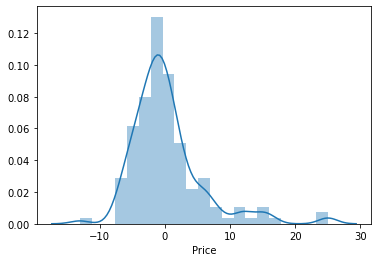

In [25]:
import seaborn as sns
sns.distplot(y_test-prediction_lasso)

<AxesSubplot:xlabel='Price'>

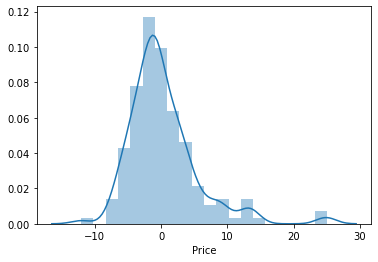

In [26]:
sns.distplot(y_test-prediction_ridge)

In [27]:
#So now we see our Ridge regression has more stable

## Multicollinarity in Linear Regression 
- it is based on correlation 


In [30]:
df_adv = pd.read_csv('Advertising.csv', index_col=0)
df_adv.head()

<IPython.core.display.Javascript object>

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [34]:
x=df_adv.drop("sales",axis=1)
y=df_adv.sales

In [35]:
x.corr()
# So we see there is no 1 in corr so there is no multicollinearity
# if there is any any 1 value between two features i take any one of these as my model

,TV,radio,newspaper
TV,1.000000,0.054809,0.056648
radio,0.054809,1.000000,0.354104
newspaper,0.056648,0.354104,1.000000
